In [1]:
#install Seaborn package. Comment after running once.
!pip install seaborn
!pip install statsmodels
!pip install -q datascience                                       
!pip install -q pandas-profiling
print('Installed...')

Installed...


In [2]:
# Import Dependencies
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
import seaborn as sns                                             
%matplotlib inline
sns.set()
import datetime
from subprocess import check_output
import scipy as sp 
from scipy import stats
from scipy.stats import norm

In [3]:
# 2. Load data
beijing_train = pd.DataFrame(pd.read_csv('beijing_train.csv',index_col = 0))        # Air Quality data for training is loaded
beijing_test = pd.DataFrame(pd.read_csv('beijing_test.csv',index_col = 0 ) )   # Air Quality data for testing is loaded

In [4]:
# 3. Check the head of the train data (first few rows)
print(beijing_train.head())
# 3. Check the head of the test data (first few rows)
print(beijing_test.head())

        year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
REF_NO                                                                       
1       2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
2       2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
3       2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
4       2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
5       2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

          PRES  DEWP  RAIN   wd  WSPM       station  
REF_NO                                               
1       1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
2       1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
3       1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
4       1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
5       1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
        year  month  day  hour   PM10   SO2    NO2      CO    O3  TEMP  \
R

In [5]:
# 4. Check for missing values
print(beijing_train.isnull().sum())
print(beijing_test.isnull().any())
print(beijing_train.shape)
print(beijing_test.shape)

year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64
year       False
month      False
day        False
hour       False
PM10       False
SO2        False
NO2        False
CO         False
O3         False
TEMP       False
PRES       False
DEWP       False
RAIN       False
wd         False
WSPM       False
station    False
dtype: bool
(403776, 17)
(16728, 16)


In [6]:
# 5. Summary Statistics
beijing_train.describe()

year          month            day           hour  \
count  403776.000000  403776.000000  403776.000000  403776.000000   
mean     2014.564194       6.735378      15.748217      11.500000   
std         1.097503       3.356479       8.808891       6.922195   
min      2013.000000       1.000000       1.000000       0.000000   
25%      2014.000000       4.000000       8.000000       5.750000   
50%      2015.000000       7.000000      16.000000      11.500000   
75%      2016.000000      10.000000      23.000000      17.250000   
max      2016.000000      12.000000      31.000000      23.000000   

               PM2.5           PM10            SO2            NO2  \
count  395301.000000  397554.000000  395000.000000  391917.000000   
mean       79.248275     104.327897      15.733060      50.352785   
std        79.146708      90.136400      21.739455      34.771910   
min         2.000000       2.000000       0.285600       1.026500   
25%        21.000000      36.000000       2.000000      23.000000   
50%        55.000000      83.000000       7.000000      43.000000   
75%       110.000000     145.000000      19.000000      71.000000   
max       999.000000     999.000000     500.000000     290.000000   

                  CO             O3           TEMP           PRES  \
count  383515.000000  390769.000000  403512.000000  403511.000000   
mean     1214.843339      58.119327      14.088899    1010.282534   
std      1124.285676      57.375966      11.303534      10.356778   
min       100.000000       0.214200     -19.900000     982.400000   
25%       500.000000      11.000000       4.000000    1002.000000   
50%       900.000000      45.000000      15.400000    1009.800000   
75%      1500.000000      83.000000      23.500000    1018.300000   
max     10000.000000    1071.000000      41.600000    1042.800000   

                DEWP           RAIN           WSPM  
count  403507.000000  403515.000000  403538.000000  
mean        3.157291       0.067052       1.718380  
std        13.617273       0.837845       1.237965  
min       -43.400000       0.000000       0.000000  
25%        -8.000000       0.000000       0.900000  
50%         4.200000       0.000000       1.400000  
75%        15.500000       0.000000       2.200000  
max        29.100000      72.500000      13.200000

In [7]:
# 5. Summary Statistics
beijing_test.describe()

year         month           day          hour          PM10  \
count  16728.0  16728.000000  16728.000000  16728.000000  16728.000000   
mean    2017.0      1.468795     15.230631     11.514168    110.716643   
std        0.0      0.499040      8.583158      6.933537    123.370127   
min     2017.0      1.000000      1.000000      0.000000      3.000000   
25%     2017.0      1.000000      8.000000      6.000000     24.000000   
50%     2017.0      1.000000     15.000000     11.000000     68.000000   
75%     2017.0      2.000000     23.000000     18.000000    153.000000   
max     2017.0      2.000000     31.000000     23.000000    994.000000   

                SO2           NO2            CO            O3          TEMP  \
count  16728.000000  16728.000000  16728.000000  16728.000000  16728.000000   
mean      18.130918     57.198290   1584.660450     39.935198      0.346082   
std       19.297973     41.855035   1740.982006     31.398917      4.706547   
min        1.000000      2.000000    100.000000      1.000000    -13.425000   
25%        5.000000     21.000000    400.000000      9.000000     -2.800000   
50%       12.000000     51.000000    900.000000     38.000000     -0.200000   
75%       25.000000     84.000000   2100.000000     64.000000      2.900000   
max      300.000000    276.000000  10000.000000    500.000000     16.200000   

               PRES          DEWP          RAIN          WSPM  
count  16728.000000  16728.000000  16728.000000  16728.000000  
mean    1021.839977    -13.451417      0.002469      2.003437  
std        6.272443      6.377738      0.035825      1.406874  
min      997.100000    -31.700000      0.000000      0.000000  
25%     1018.000000    -18.700000      0.000000      1.100000  
50%     1022.000000    -13.000000      0.000000      1.600000  
75%     1026.250000     -8.100000      0.000000      2.600000  
max     1037.600000      0.900000      1.100000     12.000000

In [8]:
# 4. Check for info
beijing_train.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403776 entries, 1 to 33648
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    395301 non-null  float64
 5   PM10     397554 non-null  float64
 6   SO2      395000 non-null  float64
 7   NO2      391917 non-null  float64
 8   CO       383515 non-null  float64
 9   O3       390769 non-null  float64
 10  TEMP     403512 non-null  float64
 11  PRES     403511 non-null  float64
 12  DEWP     403507 non-null  float64
 13  RAIN     403515 non-null  float64
 14  wd       402387 non-null  object 
 15  WSPM     403538 non-null  float64
 16  station  403776 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 97.3 MB


In [9]:
beijing_test.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 33649 to 35064
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     16728 non-null  int64  
 1   month    16728 non-null  int64  
 2   day      16728 non-null  int64  
 3   hour     16728 non-null  int64  
 4   PM10     16728 non-null  float64
 5   SO2      16728 non-null  float64
 6   NO2      16728 non-null  float64
 7   CO       16728 non-null  float64
 8   O3       16728 non-null  float64
 9   TEMP     16728 non-null  float64
 10  PRES     16728 non-null  float64
 11  DEWP     16728 non-null  float64
 12  RAIN     16728 non-null  float64
 13  wd       16728 non-null  object 
 14  WSPM     16728 non-null  float64
 15  station  16728 non-null  object 
dtypes: float64(10), int64(4), object(2)
memory usage: 3.9 MB


In [10]:
#6. to understand skew in all variables and see if y variable has a normal distribution
print(beijing_train.skew())
print(beijing_test.skew())

year     -0.066413
month    -0.053269
day       0.005683
hour      0.000000
PM2.5     1.974287
PM10      1.816482
SO2       3.007737
NO2       1.052701
CO        2.560662
O3        1.635164
TEMP     -0.168698
PRES      0.151948
DEWP     -0.250022
RAIN     29.440245
WSPM      1.625270
dtype: float64
year      0.000000
month     0.125076
day       0.042312
hour      0.001134
PM10      2.253404
SO2       3.169759
NO2       0.845052
CO        1.955740
O3        0.852595
TEMP      0.566485
PRES     -0.419652
DEWP     -0.138297
RAIN     17.861775
WSPM      1.549774
dtype: float64


In [11]:
#7. understand dash, question mark or unique values etc Univariate/Features
beijing_train['station'].unique() #to check dash, question mark etc

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [12]:
#7. understand dash, question mark or unique values etc Univariate/Features
beijing_train['wd'].unique() #to check dash, question mark etc

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [13]:
#8. understand Univariate/Features
beijing_train['PM2.5'].value_counts()

3.0      8354
10.0     6609
11.0     6418
9.0      6374
12.0     6346
         ... 
67.5        1
683.0       1
139.7       1
105.4       1
652.0       1
Name: PM2.5, Length: 866, dtype: int64

<AxesSubplot:>

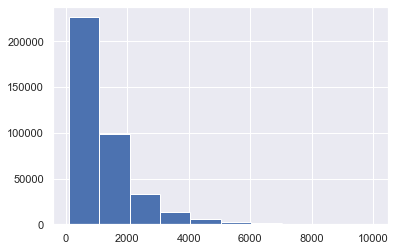

In [14]:
#9. Visualize Univariate
beijing_train['CO'].hist()

<AxesSubplot:>

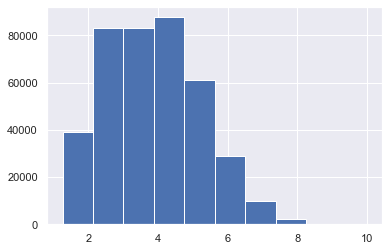

In [15]:
#10. LR Assumption, TV normally distributed 
np.cbrt(beijing_train['PM2.5']).hist()

<AxesSubplot:>

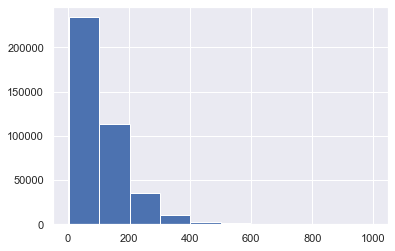

In [16]:
#11. if not log transform and check
beijing_train['PM10'].hist()

In [17]:
#Time series
#merging all time related variables to one feature
beijing_train['datetime'] = pd.to_datetime(beijing_train[['year', 'month','day', 'hour']])
# dropping off all time related variables 
beijing_train = beijing_train.drop(['year', 'month','day', 'hour'], axis = 1)
#set index for time related operations
#beijing_train.set_index('datetime', inplace=False,drop=False)
print(beijing_train.head())


        PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
REF_NO                                                                        
1         4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   
2         8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   
3         7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   
4         6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   
5         3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   

        WSPM       station            datetime  
REF_NO                                          
1        4.4  Aotizhongxin 2013-03-01 00:00:00  
2        4.7  Aotizhongxin 2013-03-01 01:00:00  
3        5.6  Aotizhongxin 2013-03-01 02:00:00  
4        3.1  Aotizhongxin 2013-03-01 03:00:00  
5        2.0  Aotizhongxin 2013-03-01 04:00:00  


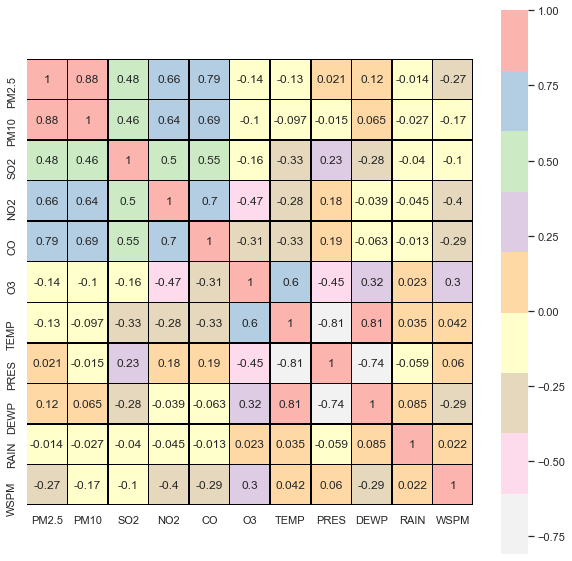

In [18]:
# 12. Check for Multicollinearity
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(beijing_train.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );



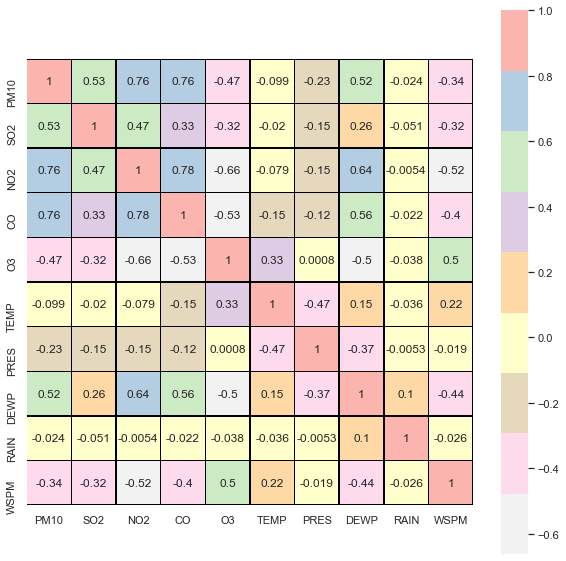

In [19]:
#Time series
#merging all time related variables to one feature
beijing_test['datetime'] = pd.to_datetime(beijing_test[['year', 'month','day', 'hour']])
# dropping off all time related variables 
beijing_test = beijing_test.drop(['year', 'month','day', 'hour'], axis = 1)
#set index for time related columns
#beijing_test.set_index('datetime', inplace=False)
beijing_test.head()

# 12. Check for Multicollinearity
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(beijing_test.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );




In [20]:
#checking shape
print(beijing_train.shape)
print(beijing_test.shape)

(403776, 14)
(16728, 13)


In [21]:
#DRop 
#The lack of rain data means that it is not often included in PM2.5 models
#Since the Temp and press , highly correlated -0.81 and Temp and Dewp highly correlated 0.80 , retaining only temp dropping rest
beijing_train = beijing_train.drop([ 'RAIN','datetime'], axis = 1)
beijing_test = beijing_test.drop(['RAIN','datetime'], axis = 1)

Text(0.5, 1.0, 'Scatterplot of pollution w.r.t PM10 and PM2.5')

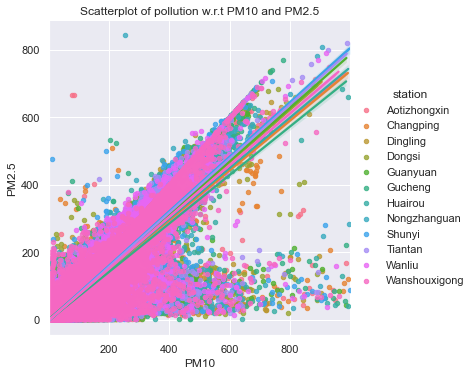

In [22]:
sns.lmplot(x='PM10', y='PM2.5', data=beijing_train, fit_reg=True, hue="station", scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of pollution w.r.t PM10 and PM2.5')

Text(0.5, 1.0, 'Scatterplot of pollution w.r.t PM10 and PM2.5')

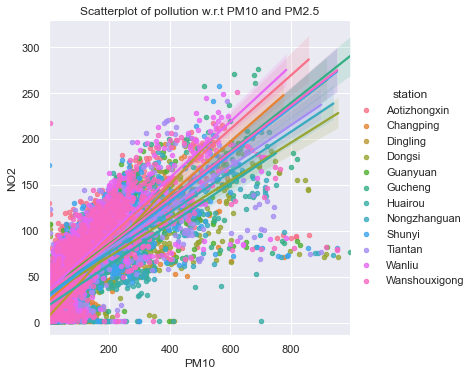

In [23]:
sns.lmplot(x='PM10', y='NO2', data=beijing_test, fit_reg=True, hue="station", scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of pollution w.r.t PM10 and PM2.5')

Text(0.5, 1.0, 'Scatterplot of pollution w.r.t PM10 and PM2.5')

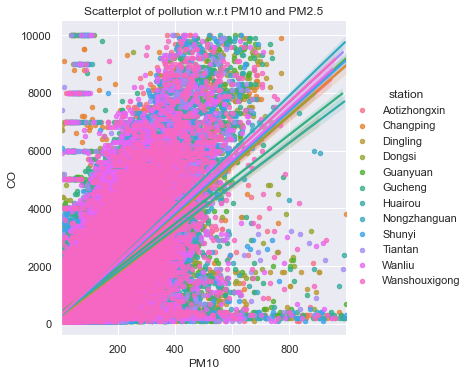

In [24]:
sns.lmplot(x='PM10',y= 'CO', data=beijing_train, fit_reg=True, hue="station", scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of pollution w.r.t PM10 and PM2.5')

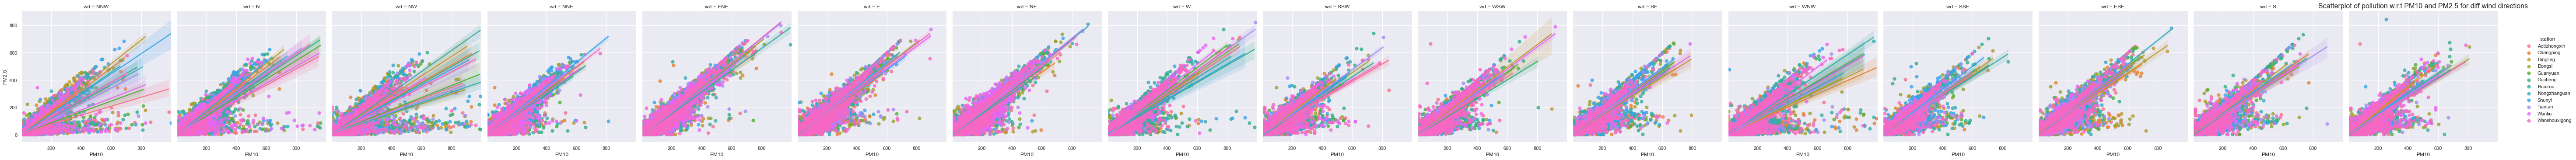

In [25]:

sns.lmplot(x='PM10', y='PM2.5', data=beijing_train, fit_reg=True, hue="station", col="wd",scatter_kws={"marker": ".", "s": 50})
plt.title('Scatterplot of pollution w.r.t PM10 and PM2.5')
plt.title('Scatterplot of pollution w.r.t PM10 and PM2.5 for diff wind directions', fontsize=16)
fig.tight_layout()

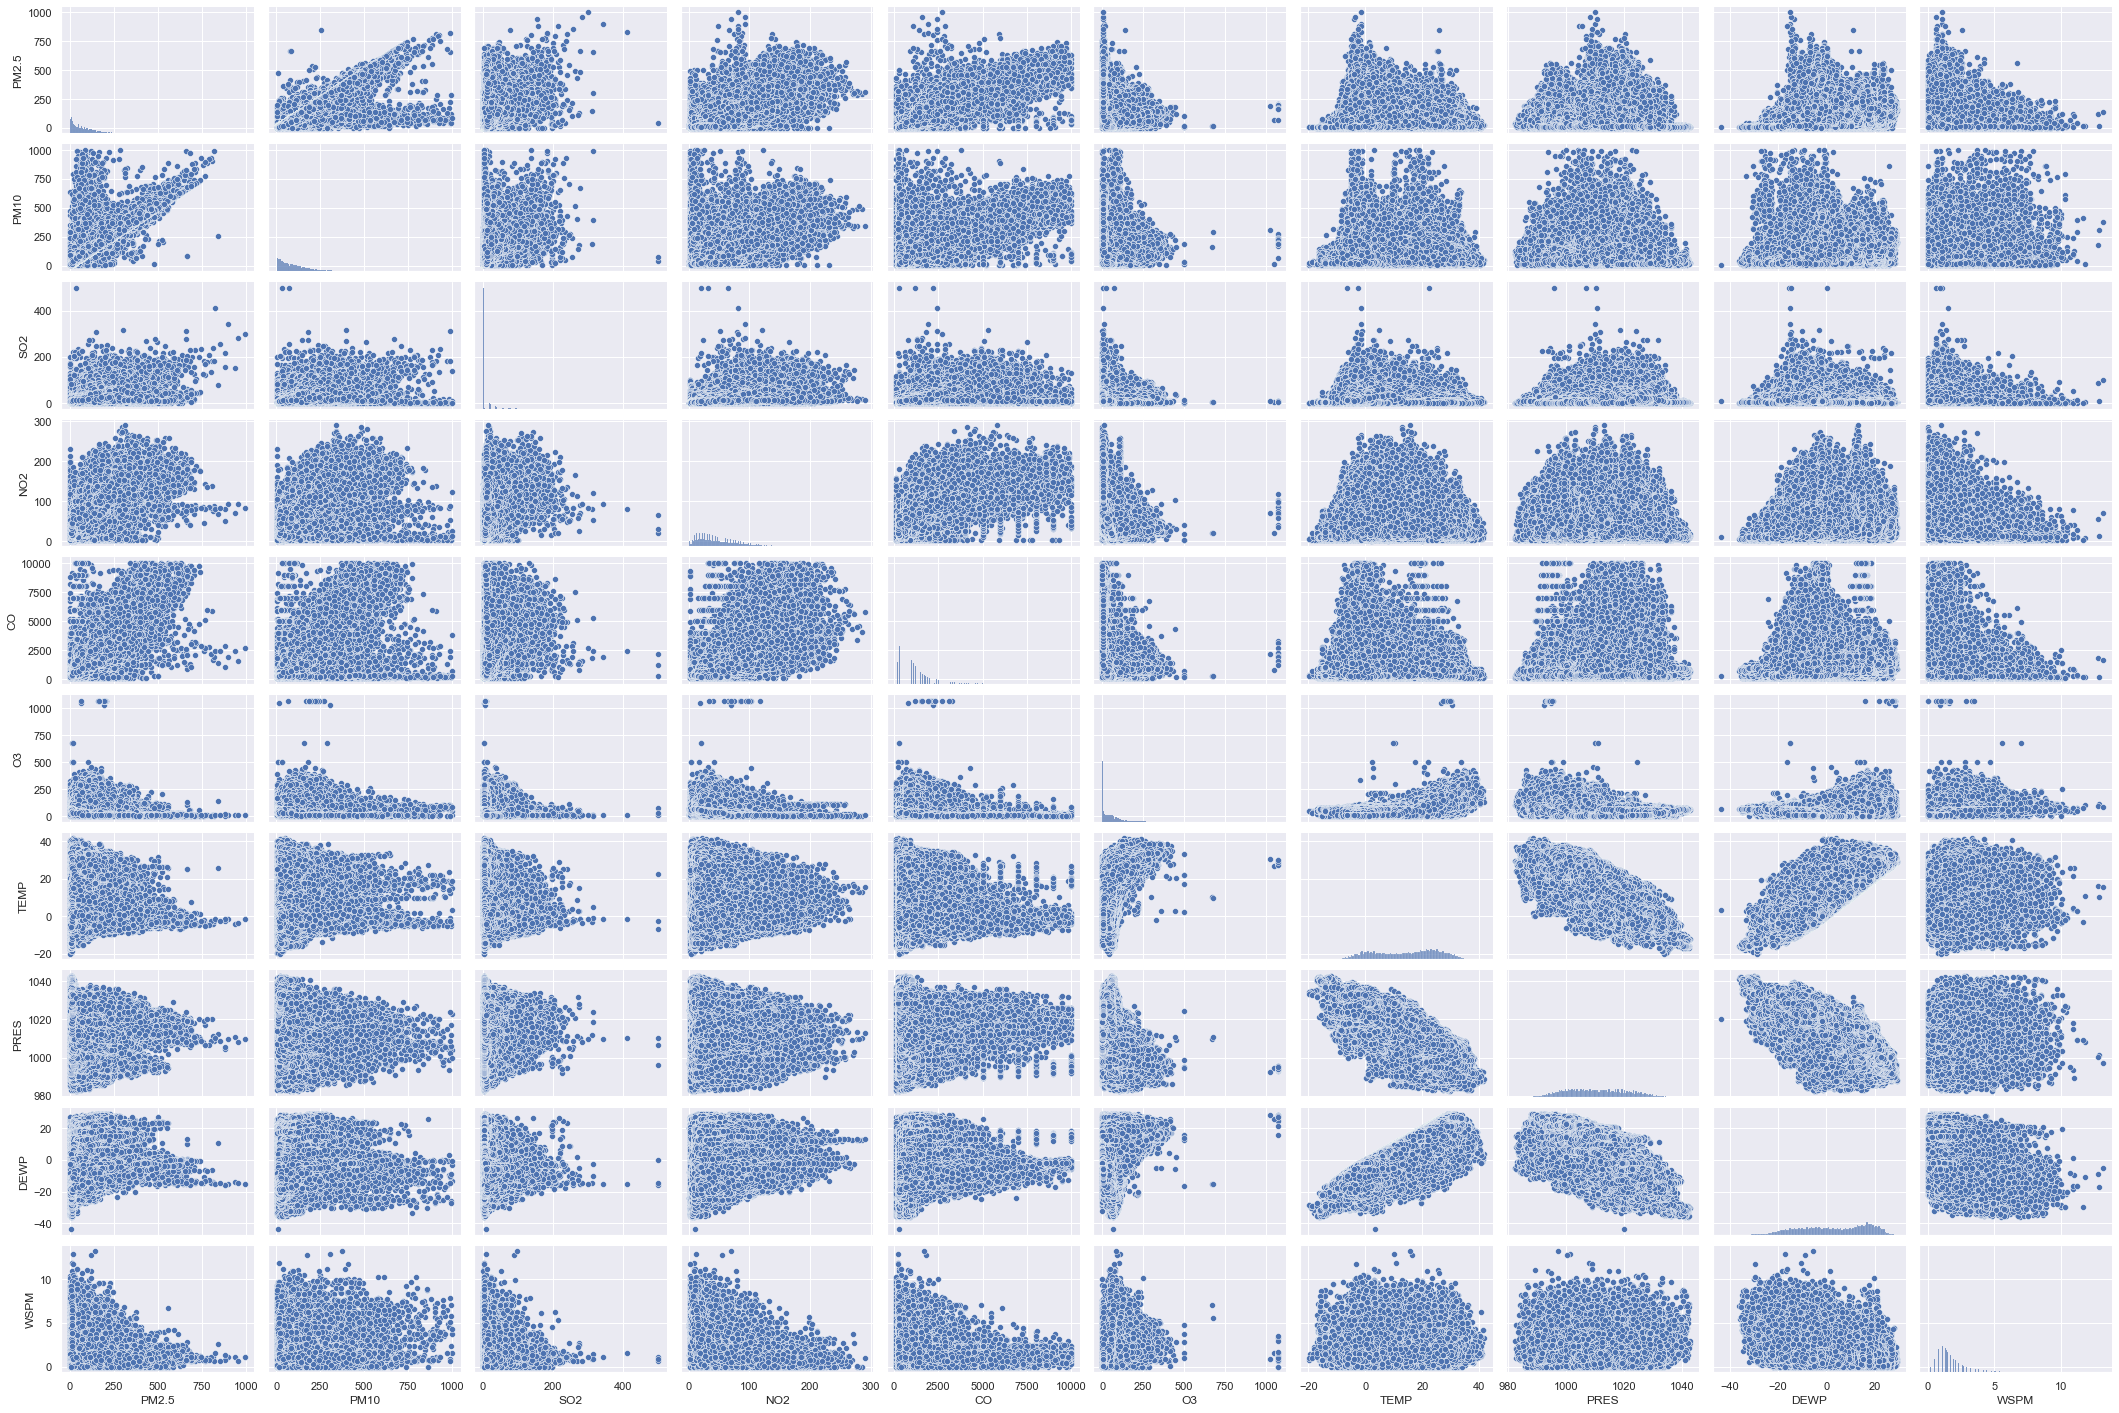

In [26]:
#13. Check for Linearity
#beijing_train['EE']  = beijing_train['CO']+beijing_train['NO2']
sns.pairplot(data=beijing_train,height=2,aspect=1.5)

#g = sns.pairplot(beijing_train, hue="station")
#g = g.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
#g = g.map_upper(sns.scatterplot)
#g = g.map_lower(sns.regplot,scatter_kws = {'alpha': 0.1,'s':3})
#g = g.map_diag(sns.histplot)
#g = g.add_legend()


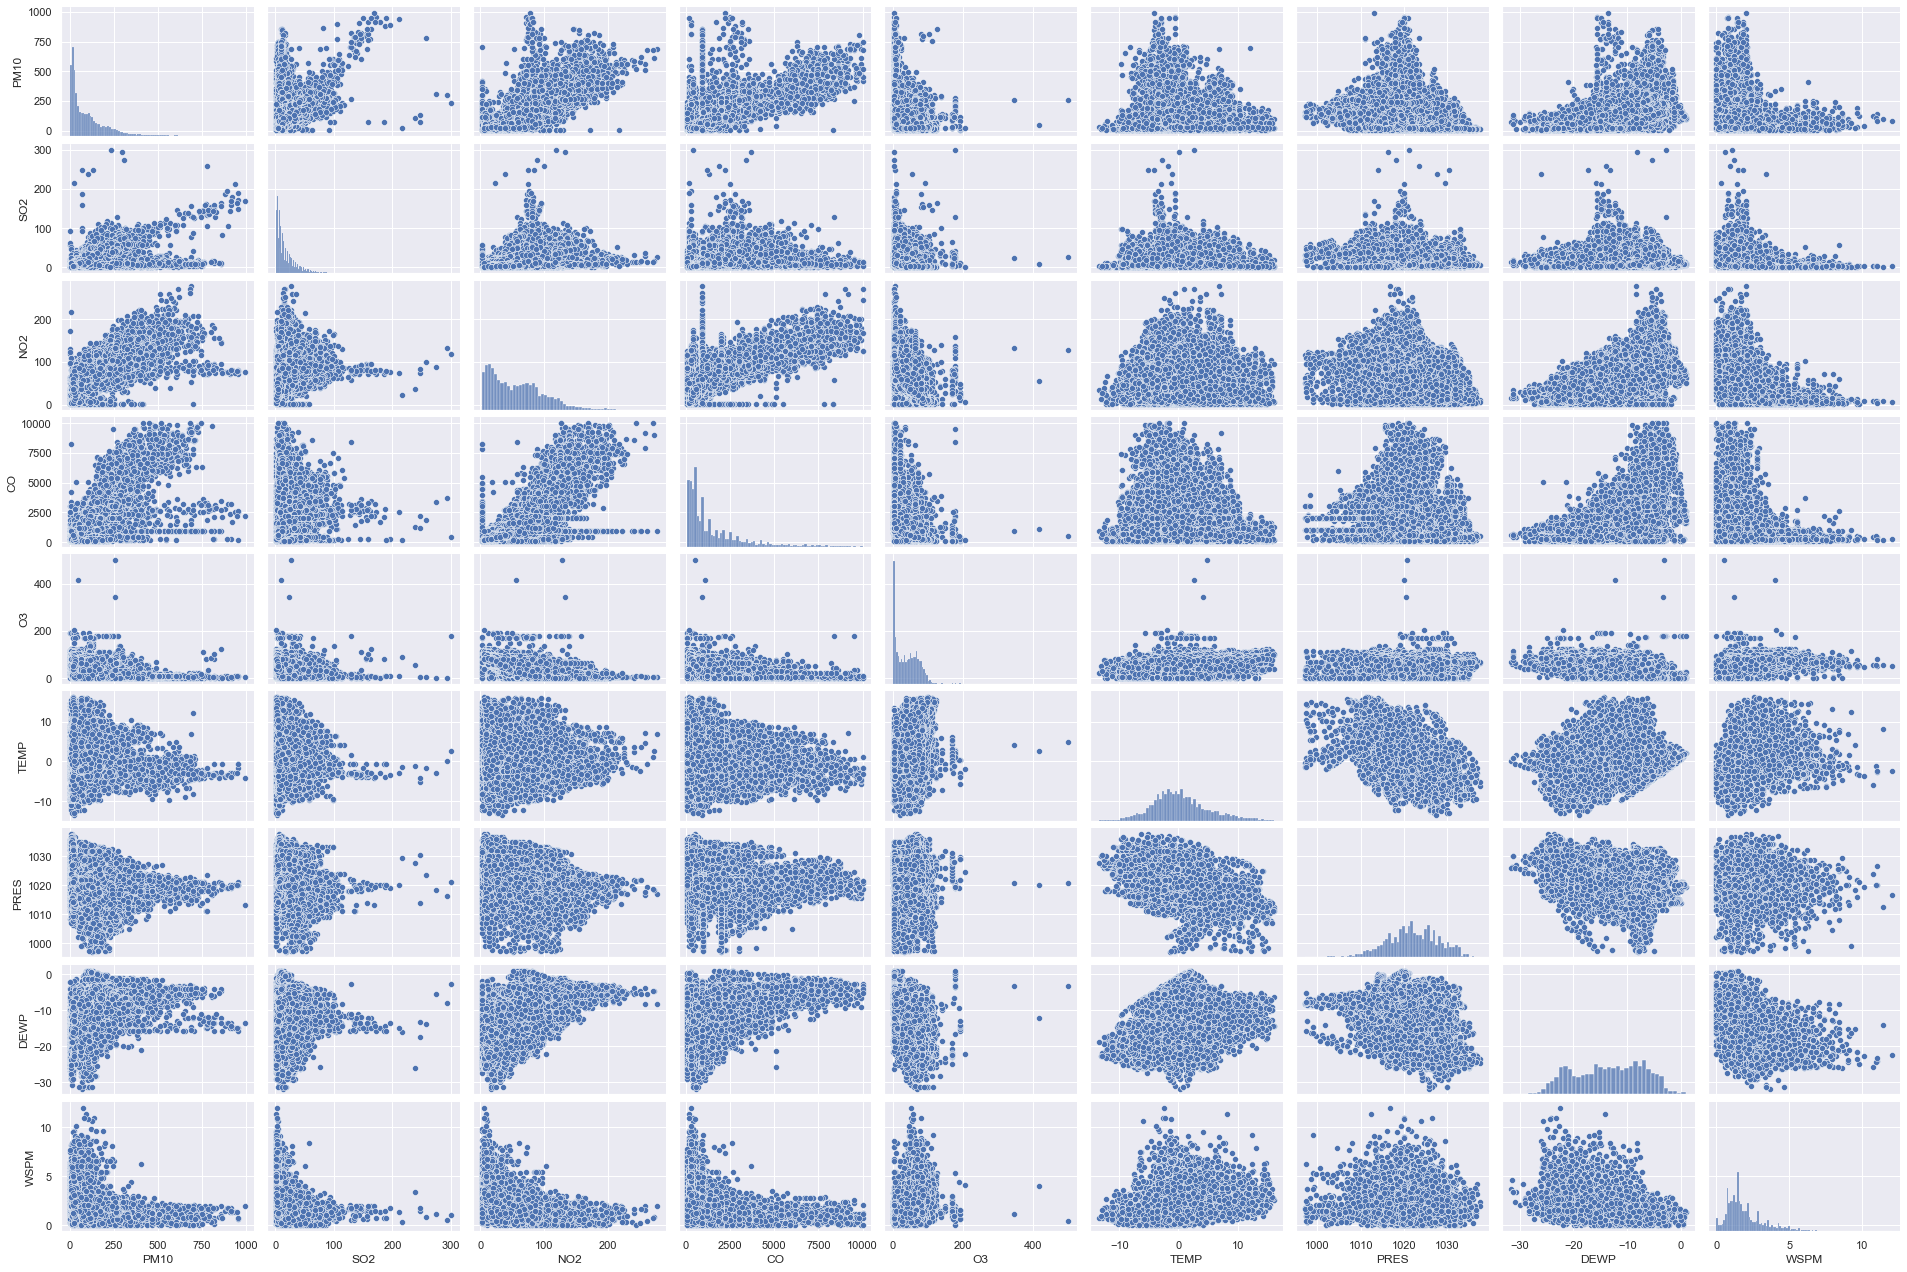

In [27]:
#13. Check for Linearity after drop

#beijing_test['EE']  = beijing_test['CO']+beijing_test['NO2']
sns.pairplot(data=beijing_test,height=2,aspect=1.5)
#g1 = sns.pairplot(beijing_test,hue="station")



In [28]:
#14. Feature Engineering
#transformations , additions, multiplications, inverse relations etc
#beijing_train['EE']  = beijing_train['CO']+beijing_train['NO2']


In [29]:
#filling in NaN values

beijing_train=(beijing_train.groupby('station').transform(lambda x: x.fillna(x.median())))
#beijing_train=(beijing_train.groupby('station').apply(lambda x: x.fillna(x.median())))

#beijing_train=beijing_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

beijing_train


PM2.5   PM10   SO2    NO2      CO    O3  TEMP    PRES  DEWP  WSPM
REF_NO                                                                   
1         4.0    4.0   4.0    7.0   300.0  77.0  -0.7  1023.0 -18.8   4.4
2         8.0    8.0   4.0    7.0   300.0  77.0  -1.1  1023.2 -18.2   4.7
3         7.0    7.0   5.0   10.0   300.0  73.0  -1.1  1023.5 -18.2   5.6
4         6.0    6.0  11.0   11.0   300.0  72.0  -1.4  1024.5 -19.4   3.1
5         3.0    3.0  12.0   12.0   300.0  72.0  -2.0  1025.2 -19.5   2.0
...       ...    ...   ...    ...     ...   ...   ...     ...   ...   ...
33644   449.0  487.0  10.0  153.0  4500.0   4.0  -1.9  1022.0  -6.1   0.9
33645   460.0  492.0  12.0  146.0  4100.0   4.0  -2.5  1022.4  -5.5   0.7
33646   463.0  498.0  12.0  141.0  4400.0   5.0  -3.0  1022.1  -5.3   0.9
33647   493.0  537.0  12.0  124.0  5000.0   8.0  -3.0  1022.7  -5.0   0.1
33648   464.0  490.0   8.0  111.0  5400.0   7.0  -4.0  1022.6  -5.7   0.9

[403776 rows x 10 columns]

In [30]:
#checking after filling NaN
print(" \nCount total NaN at each column in a DataFrame : \n\n",
beijing_train.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
WSPM     0
dtype: int64


In [31]:
beijing_train.skew()

PM2.5    2.007754
PM10     1.838839
SO2      3.048605
NO2      1.077532
CO       2.652119
O3       1.679472
TEMP    -0.168961
PRES     0.152267
DEWP    -0.250203
WSPM     1.626076
dtype: float64

In [32]:
#beijing_train = beijing_train.drop([ 'station','wd'], axis = 1)
#beijing_test = beijing_test.drop(['station','wd'], axis = 1)
#sns.distplot(beijing_train['PM2.5'],fit=norm);
#fig = plt.figure()
#res = stats.probplot(beijing_train['PM2.5'], plot=plt)

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


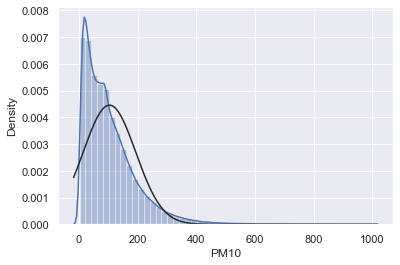

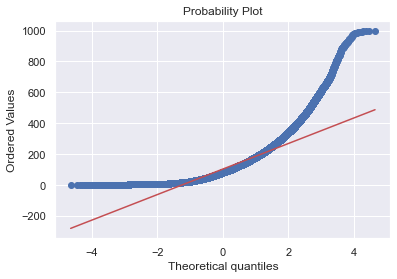

In [33]:
sns.distplot(beijing_train['PM10'],fit=norm);
fig = plt.figure()
res = stats.probplot(beijing_train['PM10'], plot=plt)

In [34]:
#sns.distplot(beijing_train['EE'],fit=norm);
#fig = plt.figure()
#res = stats.probplot(beijing_train['EE'], plot=plt)


In [35]:
#15. label encoding 
#pd.get_dummies(df, columns=['col1','col2'], drop_first=True)

In [36]:
#ReSet Index, REF_NO
beijing_train.reset_index()
beijing_test.reset_index()
beijing_train.head()

PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  WSPM
REF_NO                                                                
1         4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   4.4
2         8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   4.7
3         7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   5.6
4         6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   3.1
5         3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   2.0

In [37]:
#16.Prepare x, y variables
#X=beijing_train.loc[:,beijing_train.columns!='PM2.5']
features = ['PM10','TEMP','CO','SO2','WSPM','TEMP','PRES','DEWP','NO2','O3']    
#X=beijing_train[['PM10','CO','NO2','SO2','O3']]
#print(X.head())
y=beijing_train['PM2.5']


X_test=beijing_test[features]
print(X_test.head())
#print(y.head())


         PM10  TEMP      CO   SO2  WSPM  TEMP    PRES  DEWP    NO2    O3
REF_NO                                                                  
33649   496.0  -4.7  6100.0   8.0   1.0  -4.7  1022.1  -6.1  121.0   4.0
33650   497.0  -5.2  6300.0   7.0   0.7  -5.2  1022.3  -6.4  113.0   4.0
33651   469.0  -5.4  6200.0   7.0   1.1  -5.4  1022.5  -6.5  111.0   4.0
33652   425.0  -5.2  5900.0   6.0   1.1  -5.2  1022.5  -6.2  109.0   3.0
33653   468.0  -5.0  7700.0  10.0   1.0  -5.0  1021.9  -5.8  123.0  16.0


In [38]:
from sklearn.model_selection import train_test_split

beijing_train1, beijing_val,y_train,y_val = train_test_split(beijing_train,y, test_size = 0.2,random_state=2)
X_train = beijing_train1[features]
#y_train =beijing_train1['PM2.5']
y_cbrt_train = np.cbrt(beijing_train1['PM2.5'])
print(y_train)
X_val = beijing_val[features]
#y_val = beijing_val['PM2.5']
y_cbrt_val =np.cbrt(beijing_val['PM2.5'])
print(y_val)
print(y_cbrt_val)
print(y_cbrt_train)

#16. Train, test split
#from sklearn.model_selection import train_test_split
#X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.2,random_state=1 )

#X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.2,random_state=1 )

REF_NO
31153     15.0
29953     52.0
19080     59.0
33074    184.0
4533      46.0
         ...  
17139     68.0
28521     35.0
1358      60.0
33584     11.0
14921     10.0
Name: PM2.5, Length: 323020, dtype: float64
REF_NO
28480     95.0
6673      97.0
2791      70.0
673       32.0
26426     52.0
         ...  
26673    206.0
29920    140.0
16963     42.0
18123    102.0
4260      45.0
Name: PM2.5, Length: 80756, dtype: float64
REF_NO
28480    4.562903
6673     4.594701
2791     4.121285
673      3.174802
26426    3.732511
           ...   
26673    5.905941
29920    5.192494
16963    3.476027
18123    4.672329
4260     3.556893
Name: PM2.5, Length: 80756, dtype: float64
REF_NO
31153    2.466212
29953    3.732511
19080    3.892996
33074    5.687734
4533     3.583048
           ...   
17139    4.081655
28521    3.271066
1358     3.914868
33584    2.223980
14921    2.154435
Name: PM2.5, Length: 323020, dtype: float64


In [39]:
#17. Scaling x variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform((X_train))
X_val=scaler.transform((X_val))
X_test=scaler.transform((X_test))

#Standard Scaler

#def normalize_feature(feature):
#"""
#input a feature column name in as df['feature']
#returns series of normalized feature values
# """
    #return (feature - feature.mean()) / feature.std()    

In [40]:
#18. LR
regressor = LinearRegression()
regressor.fit(X_train,y_cbrt_train)

LinearRegression()

In [41]:
# this gives the coefficients of the 10 features selected above. 
# this gives the coefficients of the 10 features selected above. 
def lr():
    features.insert(0,'Intercept')
    coef = regressor.coef_.tolist()
    coef.insert(0, regressor.intercept_)
    eq1 = zip(features, coef)
    for c1,c2 in eq1:
        print(c1,c2)
lr()

Intercept 3.852134045210307
PM10 0.7335382032400074
TEMP -0.17712239555558848
CO 0.21723172452208703
SO2 0.14923986677871445
WSPM -0.03994779817143473
TEMP -0.17712239555558854
PRES 0.044523375063947865
DEWP 0.5653800801874721
NO2 0.16544999652846873
O3 0.1625703951393956


In [42]:
#19. predicting y
train_pred = regressor.predict(X_train)

train_pred=np.power(train_pred,3)
train_pred_df= pd.DataFrame(train_pred)
def lr():  
    train_pred_df.columns = ['PM2.5']
    head =train_pred_df.head()
    return head
lr()




PM2.5
0   27.265682
1   46.858020
2   47.539544
3  154.209186
4   56.838396

In [43]:
val_pred = regressor.predict(X_val)
val_pred
val_pred=np.power(val_pred,3)
val_pred_df=pd.DataFrame(val_pred)
def lr():  
    val_pred_df.columns = ['PM2.5']
    head = val_pred_df.head()
    return head
lr()


PM2.5
0  114.299792
1   69.834725
2   41.308811
3   23.108004
4   54.286359

In [44]:
test_pred = (regressor.predict(X_test))
test_pred
test_pred=np.power(test_pred,3)
test_pred_df=pd.DataFrame(test_pred)
def lr():  
    test_pred_df.columns = ['PM2.5']
    head =  test_pred_df.head()
    return head
lr()


PM2.5
0  604.531674
1  607.986579
2  551.842816
3  468.826502
4  640.772851

In [45]:
beijing_test=beijing_test.drop(['SO2'], axis=1)
print(beijing_test.head())

beijing_future_pred=pd.concat([beijing_test,test_pred_df.set_index(beijing_test.index)], axis=1)
beijing_future_pred

         PM10    NO2      CO    O3  TEMP    PRES  DEWP   wd  WSPM  \
REF_NO                                                              
33649   496.0  121.0  6100.0   4.0  -4.7  1022.1  -6.1  ENE   1.0   
33650   497.0  113.0  6300.0   4.0  -5.2  1022.3  -6.4    E   0.7   
33651   469.0  111.0  6200.0   4.0  -5.4  1022.5  -6.5  ENE   1.1   
33652   425.0  109.0  5900.0   3.0  -5.2  1022.5  -6.2    E   1.1   
33653   468.0  123.0  7700.0  16.0  -5.0  1021.9  -5.8  ENE   1.0   

             station  
REF_NO                
33649   Aotizhongxin  
33650   Aotizhongxin  
33651   Aotizhongxin  
33652   Aotizhongxin  
33653   Aotizhongxin  


PM10    NO2      CO    O3  TEMP    PRES  DEWP   wd  WSPM  \
REF_NO                                                              
33649   496.0  121.0  6100.0   4.0  -4.7  1022.1  -6.1  ENE   1.0   
33650   497.0  113.0  6300.0   4.0  -5.2  1022.3  -6.4    E   0.7   
33651   469.0  111.0  6200.0   4.0  -5.4  1022.5  -6.5  ENE   1.1   
33652   425.0  109.0  5900.0   3.0  -5.2  1022.5  -6.2    E   1.1   
33653   468.0  123.0  7700.0  16.0  -5.0  1021.9  -5.8  ENE   1.0   
...       ...    ...     ...   ...   ...     ...   ...  ...   ...   
35060    32.0   24.0   400.0  72.0  12.5  1013.5 -16.2   NW   2.4   
35061    32.0   41.0   500.0  50.0  11.6  1013.6 -15.1  WNW   0.9   
35062    28.0   38.0   500.0  54.0  10.8  1014.2 -13.3   NW   1.1   
35063    23.0   30.0   400.0  59.0  10.5  1014.4 -12.9  NNW   1.2   
35064    19.0   38.0   600.0  49.0   8.6  1014.1 -15.9  NNE   1.3   

              station       PM2.5  
REF_NO                             
33649    Aotizhongxin  604.531674  
33650    Aotizhongxin  607.986579  
33651    Aotizhongxin  551.842816  
33652    Aotizhongxin  468.826502  
33653    Aotizhongxin  640.772851  
...               ...         ...  
35060   Wanshouxigong   10.234130  
35061   Wanshouxigong   12.684871  
35062   Wanshouxigong   13.811639  
35063   Wanshouxigong   12.779267  
35064   Wanshouxigong   11.928556  

[16728 rows x 11 columns]

In [46]:
beijing_future_pred.drop(['PM10', 'CO','O3', 'TEMP','DEWP','NO2','PRES','WSPM','wd','station'], axis=1, inplace=True)
beijing_future_pred

PM2.5
REF_NO            
33649   604.531674
33650   607.986579
33651   551.842816
33652   468.826502
33653   640.772851
...            ...
35060    10.234130
35061    12.684871
35062    13.811639
35063    12.779267
35064    11.928556

[16728 rows x 1 columns]

In [47]:
beijing_future_pred.to_csv("submission_cbrt.csv",index=True, header=False)

In [48]:
#20. RMSE
from sklearn import metrics

MSE_train = metrics.mean_squared_error((y_train), train_pred)
MSE_val = metrics.mean_squared_error((y_val), val_pred)
print(MSE_train)
print(MSE_val)

2149.42577311233
2141.2605956827565


In [49]:
RMSE_train = MSE_train**0.5
RMSE_val = MSE_val**0.5
print(RMSE_train)
print(RMSE_val)

46.361900016202206
46.27375709495347


C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

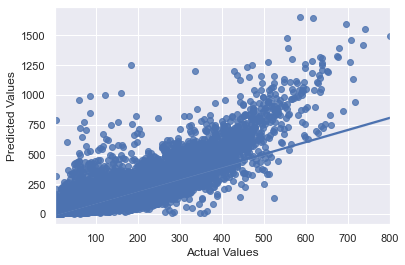

In [50]:

sns.regplot(y_val,val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [51]:
r2_train = metrics.r2_score(y_train,train_pred)
r2_val = metrics.r2_score(y_val,val_pred)

print("R2 score for training set is {}".format(r2_train))
print("R2 score for validation set is {}".format(r2_val))

R2 score for training set is 0.6495073587361592
R2 score for validation set is 0.6545643712117748


In [52]:
#print('Mean Absolute Error:', np.expm1(metrics.mean_absolute_error(y_val, val_pred)))
#print('Mean Squared Error:', np.expm1(metrics.mean_squared_error(y_val, val_pred)))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, val_pred)))

__y = 7.90280437416384 + 2.319680 `*` PM10 + 0.771783 `*` CO + 0.398876 `*` NO2 + 0.395931`*` SO2 + 0.440331 `*` O3 + 1.551380 `*` DEWP  - 0.987982 `*` TEMP + 0.152224 `*` PRES - 0.087732 `*` WSPM__

**MODEL EVALUATION**
- **R^2 values**
- R2 score for training set is 0.7915587272957498
- R2 score for validation set is 0.7928783338420946 
- **RMSE values**
- 35.76348281520417
- 35.77757548421066

**Observations**

# Model 2

**Feature Engineering with TEMP and DEWP**
- As problem statement requires CO and NOx can be used as a proxy for exhaust emissions, we are merging both to get better correlation to PM 2.5 


_y = 3.8522113084535388 + 0.812582 * PM10 + 0.348878 * EE  + 0.105443* SO2 + 0.040592 * O3 +  0.139734 * TEMP  - 0.204512 * WSPM_

**MODEL EVALUATION**
- **R^2 values**
- R2 score for training set is 0.5238575864054658
- R2 score for validation set is 0.5316316785943511 

- **RMSE values**
- 54.05257427655463
- 53.8011920014414

# Model 1a

#  only gases and particulate matter

__y = 7.902481762338424 + 2.358638 `*` PM10 + 1.047859 `*` CO + 0.598468 `*` NO2 + 0.056990 `*` SO2 + 0.369880 `*` O3__

**MODEL EVALUATION**
- **R^2 values**
- R2 score for training set is 0.7915587272957498
- R2 score for validation set is 0.7928783338420946 
- **RMSE values**
- 35.76348281520417
- 35.77757548421066

# Model2

# Without O3


 __y = 7.902804374163844 + 2.503340 `*` PM10 + 0.984813 `*` CO + 0.366002 `*` NO2 + 0.081037 `*` SO2 __

**MODEL EVALUATION**
- **R^2 values**
- R2 score for training set is 0.7144643182196191
- R2 score for validation set is 0.7173160299743766
- **RMSE values**
- 41.857967972130815
- 41.797348482938204

**Observation**

# Without O3, NO2


  __y = 7.902804374163844 + 2.613438 `*` PM10 + 1.132194 `*` CO  + 0.132304`*` SO2 __

**MODEL EVALUATION**
- **R^2 values**
- R2 score for training set is 0.6971073985562408
- R2 score for validation set is 0.7005401609183037
- **RMSE values**
- 43.11141528248918
- 43.01970565596248

# MODEL4

__y = 7.902804374163844 + 2.635255 * PM10 + 1.188931 * CO__


**MODEL EVALUATION**
- **R^2 values**
- R2 score for training set is 0.6908850626551022
- R2 score for validation set is 0.6944690957446924 
- **RMSE values**
- 43.551983970395476
- 43.45359515595859

# MODEL5

__y = 7.902804374163844 + 3.444821 * PM10__

**MODEL EVALUATION**
- **R^2 values**
- R2 score for training set is 0.5990066976947879
- R2 score for validation set is 0.6098135369628819
- **RMSE values**
- 49.6039780992606
- 49.1059638970618